# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analysing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing data set,  which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.  

## Objectives
You will be able to:
* Show mastery of the content covered in this section

# Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At minimum, this should include:

* Loading the data (which is stored in the file train.csv)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new datagrames based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

# Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centres.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

In [31]:
#Loading the data (which is stored in the file train.csv)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('train.csv')
df.info() #At first glance I notice there don't seem to be any null values to clean, 
#aka all columns have the same number of cells filled.
#Also, all columns have numerical values, so I won't have to clean any stringsto make them more readable.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E208860>,
      dtype=object)

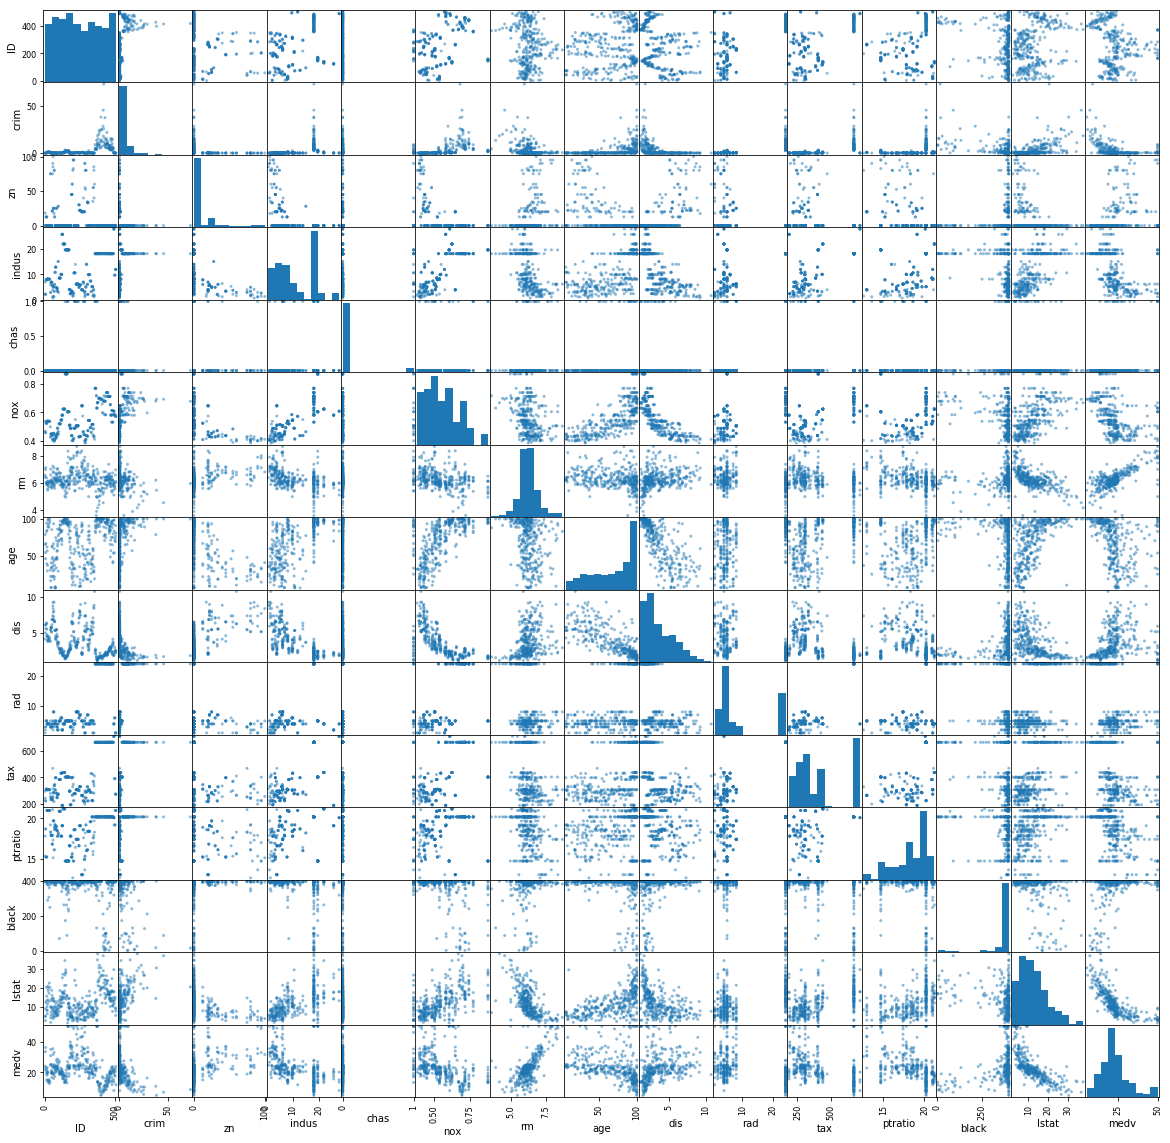

In [75]:
pd.plotting.scatter_matrix(df, figsize=(20,20))

In [2]:
#"Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables"

df.describe()
# I notice that the chas column, which only has 0 and 1 values, has a mean very close to 0, 
#so I'm guessing that most of the values are 0 and very few are 1.



,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [4]:
df['chas'].value_counts()
#0    313
#1     20
#Name: chas, dtype: int64
#Indeed 313 values are 0 and 20 values are 1.

0    313
1     20
Name: chas, dtype: int64

In [5]:
# I don't understand at this point why the first and second quartlies of zn would be 0.
print(df['zn'].mean())
print(df['zn'].median())
print(df['zn'].mode())
df['zn'].describe()

10.68918918918919
0.0
0    0.0
dtype: float64


count    333.000000
mean      10.689189
std       22.674762
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: zn, dtype: float64

In [54]:
df['zn'].value_counts() # There's one zone with 100% of its land zoned for lots over 25,000sqft. Is this an exurb, or an airport?

0.0      248
20.0      14
25.0       7
80.0       7
22.0       7
12.5       6
45.0       5
30.0       3
90.0       3
95.0       3
60.0       3
33.0       3
55.0       3
75.0       3
34.0       3
21.0       3
40.0       2
28.0       2
85.0       2
35.0       1
100.0      1
17.5       1
82.5       1
52.5       1
18.0       1
Name: zn, dtype: int64

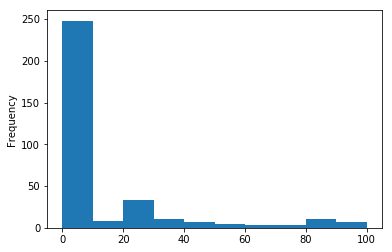

In [9]:
df['zn'].plot(kind='hist')
#If most neighborhoods have 0% of land in large (25k sqft +) plots, as indicated by the histogram
#below, then most neighborhoods have small plots. I wonder if the neighborhoods with large plots are further from the city center.
#I hypothesize that neighborhoods with large plots will have greater accessibility to radial highways, and further distances to 
#employment centers.

In [10]:
df['ptratio'].describe() #This fiueld is very tightly dispersed.

count    333.000000
mean      18.448048
std        2.151821
min       12.600000
25%       17.400000
50%       19.000000
75%       20.200000
max       21.200000
Name: ptratio, dtype: float64

In [11]:
print(df['ptratio'].mean())
print(df['ptratio'].median())
print(df['ptratio'].mode()) 
#The three measures of centrality show a tight dispersion. 
#The biggest outlier is the minimum value, 12, which is a few stds away from the middle.

18.448048048047994
19.0
0    20.2
dtype: float64


In [12]:
df['ptratio'].value_counts()
#y the far the most frequently-occuring value is 20.2, which is in the 3rd quartile and is very close to the max.
# The mean, 18.44, must be gettign pulled down from 20 by some of the outlying low values.
#These might be very wealthy areas since their proportion of teachers to pupils is so low.

20.2    94
14.7    24
21.0    17
17.8    16
17.4    14
19.1    13
18.4    12
16.6    11
18.6    10
21.2    10
15.2     9
17.9     9
19.2     9
13.0     8
20.9     8
18.7     6
16.1     5
19.7     5
18.5     4
19.6     4
20.1     4
18.2     3
19.0     3
16.0     3
16.8     3
17.6     3
14.9     3
18.3     3
15.3     3
18.9     2
16.9     2
17.0     2
15.6     2
18.0     1
16.4     1
13.6     1
15.5     1
12.6     1
17.3     1
15.1     1
21.1     1
15.9     1
Name: ptratio, dtype: int64

In [13]:
df['rm'].describe()

count    333.000000
mean       6.265619
std        0.703952
min        3.561000
25%        5.884000
50%        6.202000
75%        6.595000
max        8.725000
Name: rm, dtype: float64

In [14]:
print(df['rm'].mean())
print(df['rm'].median())
print(df['rm'].mode())

6.265618618618616
6.202000000000001
0    6.127
1    6.229
dtype: float64


In [ ]:
#Create meaningful subsets of the data using selection operations using .loc, .iloc or related operations. 
#Explain why you used the chosen subsets and do this for 3 possible 2-way splits. 
#State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. 
#Examples of potential splits:
#Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
#reate 2 new datagrames based on a certain split for crime rate.

In [25]:
#SPLIT 1: neighborhoods with small plots and neighborhoods with big plots
#Hypothesis: neighborhoods with large plots will have greater accessibility to radial highways
#and further distances to #employment centers.
small_plots_df = df.loc[df['zn'] == 0.0]
large_plots_df = df.loc[df['zn'] != 0.0]


count    248.000000
mean      11.379032
std        9.462556
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max       24.000000
Name: rad, dtype: float64


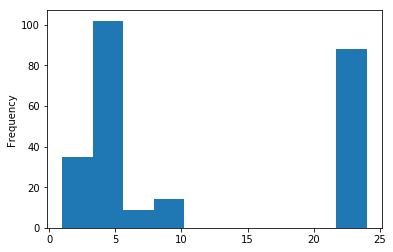

In [29]:
print(small_plots_df['rad'].describe())
small_plots_df['rad'].plot(kind='hist')

count    85.000000
mean      4.541176
std       1.880685
min       1.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       8.000000
Name: rad, dtype: float64


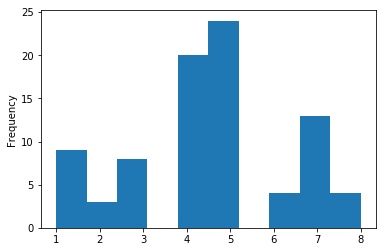

In [32]:
print(large_plots_df['rad'].describe())
large_plots_df['rad'].plot(kind='hist')
#Looks like there is a very clear divide in proximity to radial highways between 
#small-plot neighborhoods and large-plot neighborhoods. I'd like to layer
#the histograms on top of each other to see this more clearly.

Text(0.5,1,'Accessibility to radial highways in neighborhoods with plots under 25k sqft and over 25k sqft')

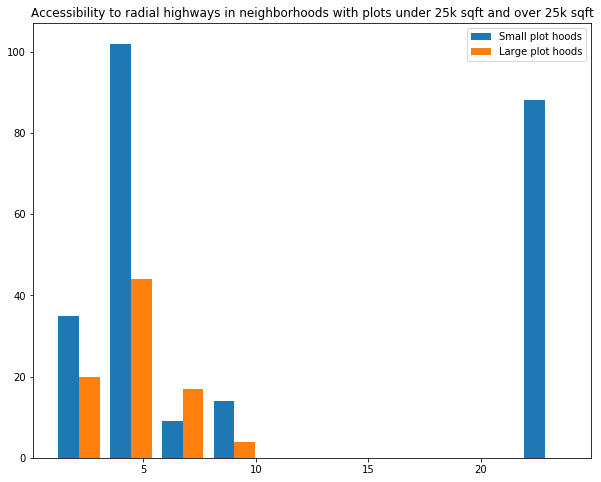

In [53]:
fig = plt.figure(figsize=(10,8))
labels = ['Small plot hoods', 'Large plot hoods']
plt.hist(x=(small_plots_df['rad'], large_plots_df['rad']), label=labels, stacked=False)
plt.legend()
plt.title('Accessibility to radial highways in neighborhoods with plots under 25k sqft and over 25k sqft')


In [54]:
#Most neighborhoods with both large plots and small plots have similar accessibility
#to radial highways. However 1/3 of hoods with small plots only have an extremely
#high index. No large-plot hoods do.
#I would like to see these neighborhoods all plotted on a map of Boston.

In [61]:
tax = df['tax']
ptratio = df['ptratio']




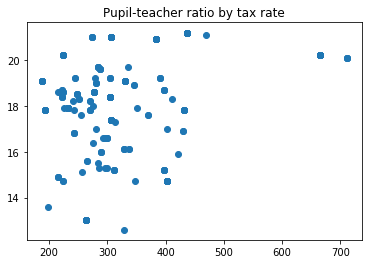

In [68]:
plt.scatter(tax, ptratio)
plt.title('Pupil-teacher ratio by tax rate')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011DB3320>,
      dtype=object)

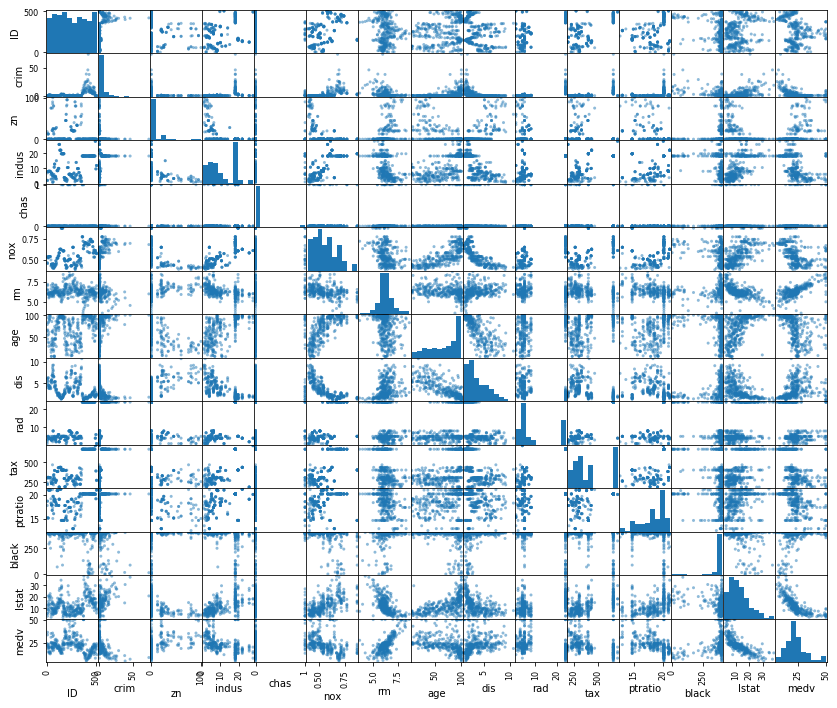

In [1]:
#Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. 
#Make sure to use subplots so it is easy to compare the relationships.

## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!